## 5分钟拥有文本生成音乐AI-Audiocraft
### 一个简单可用高质量的文本生成音乐模型

## Audiocraft介绍
- 官网：https://github.com/facebookresearch/audiocraft
- Audiocraft 是一个facebook出品，使用深度学习进行音频处理和生成的库。 它具有最先进的 EnCodec 音频压缩器

- Audiocraft 为 MusicGen 提供代码和模型，MusicGen 是一种简单且可控的音乐生成模型。

- MusicGen是一种简单且可控的音乐生成模型， 可通过文本和旋律来生成音乐。 通过单级自回归 Transformer 模型，在 32kHz EnCodec 分词器上训练，具有 4 个以 50Hz 采样的码本。 与 MusicLM 等现有方法不同，MusicGen 不需要自我监督的语义表示，它一次生成所有 4 个码本。 通过在码本之间引入一个小的延迟，我们表明我们可以并行预测它们，因此每秒音频只有 50 个自回归步骤。 查看我们的示例页面或测试可用的演示！

- 官方使用 20K 小时的授权音乐来训练 MusicGen。 具体来说，我们依赖于 10K 高质量音乐曲目的内部数据集，以及 ShutterStock 和 Pond5 音乐数据。

## 原理

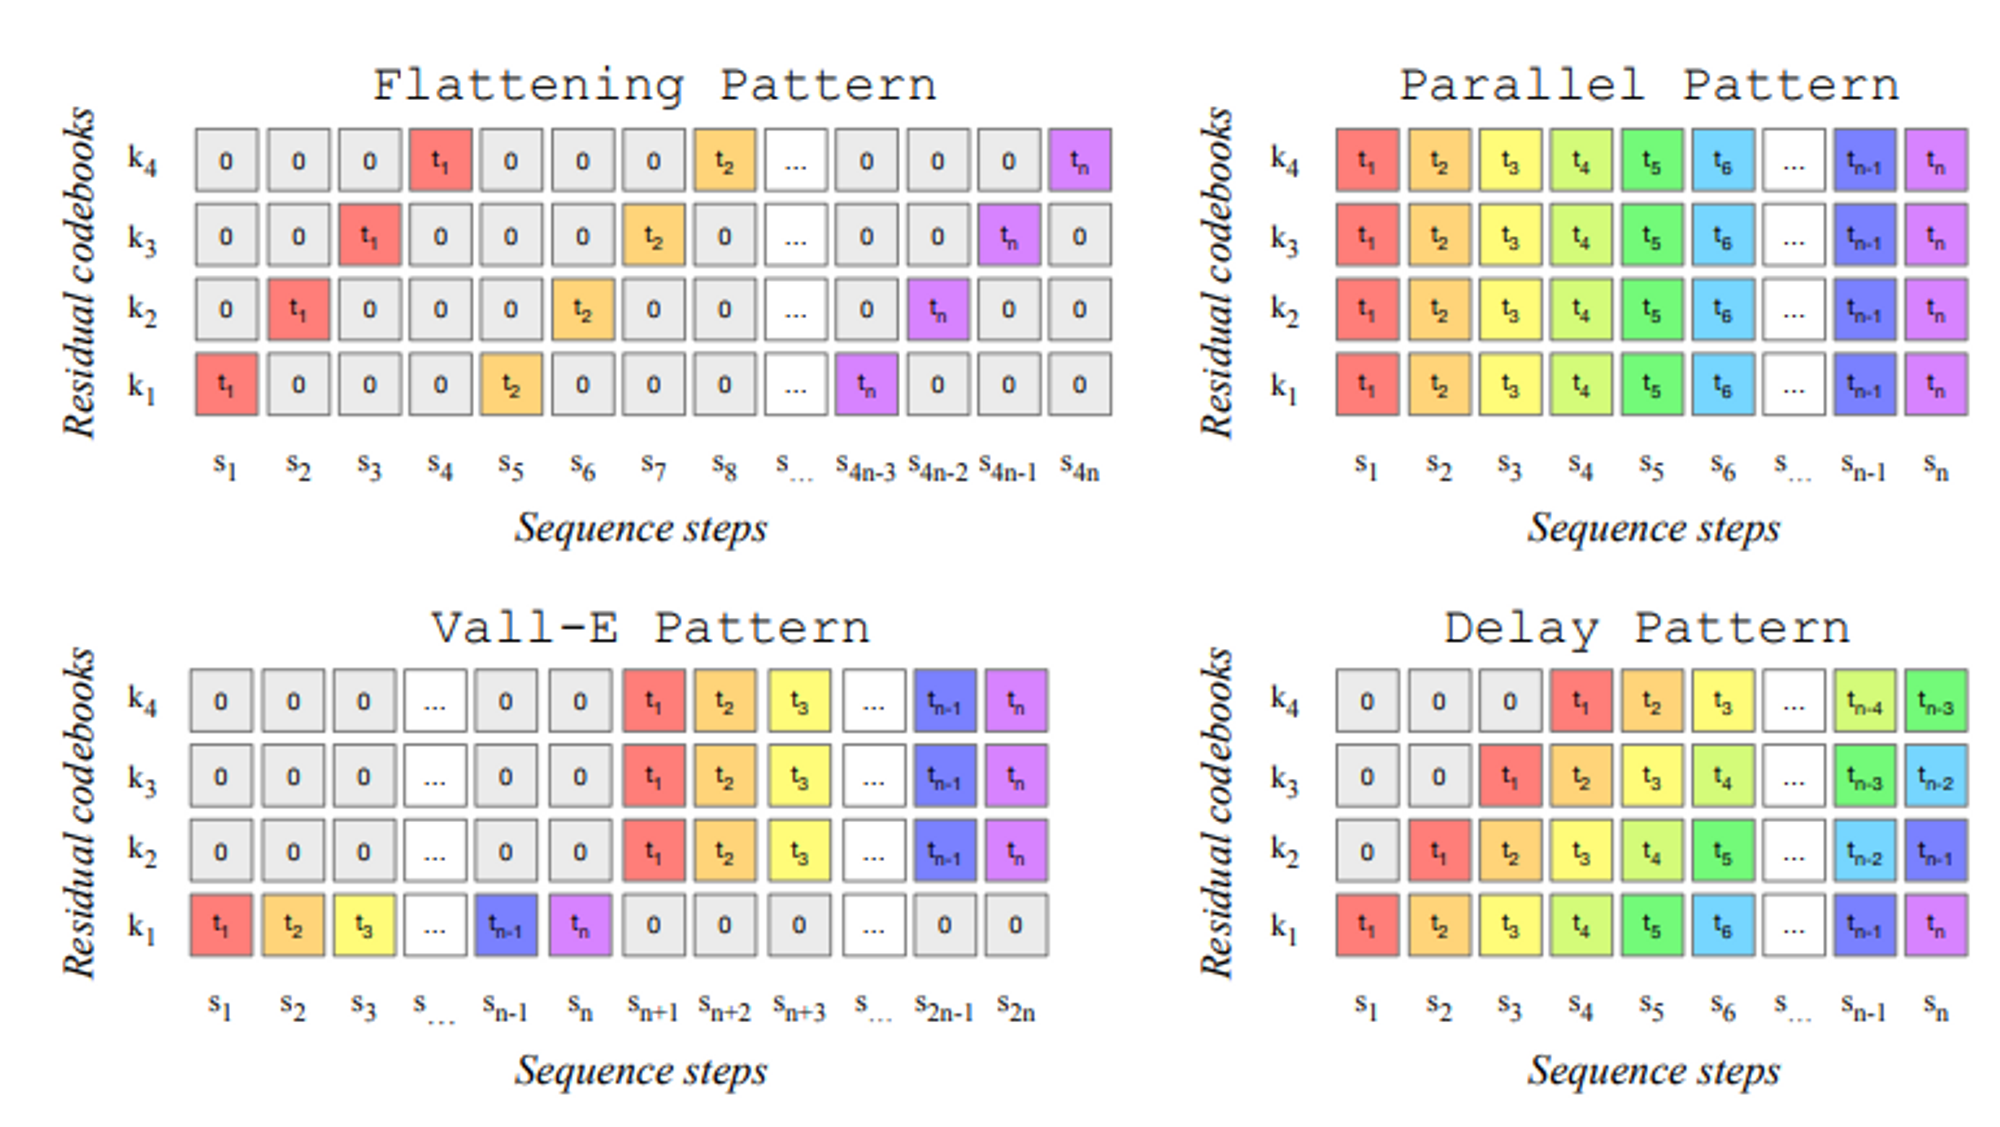
- MusicGen是一种单一语言模型 (LM)，可在多个压缩离散音乐表示流（即令牌）上运行。
- MusicGen 由单级变压器 LM 和高效的令牌交错模式组成，这消除了级联多个模型的需要，例如，分层或上采样。
- 码本交错模式。 每个时间步 t1, t2, . . . , 是由 4 个量化值组成（对应于 k1，...，k4）。 在进行自回归建模时，我们可以以各种方式展平或交错它们，从而产生具有 4 个并行流的新序列和步骤 s1, s2, . . . , 米。 序列步骤总数 M 取决于模式和原始步骤数 N. 0 是一个特殊标记，表示模式中的空位置

### 数据集验证效果

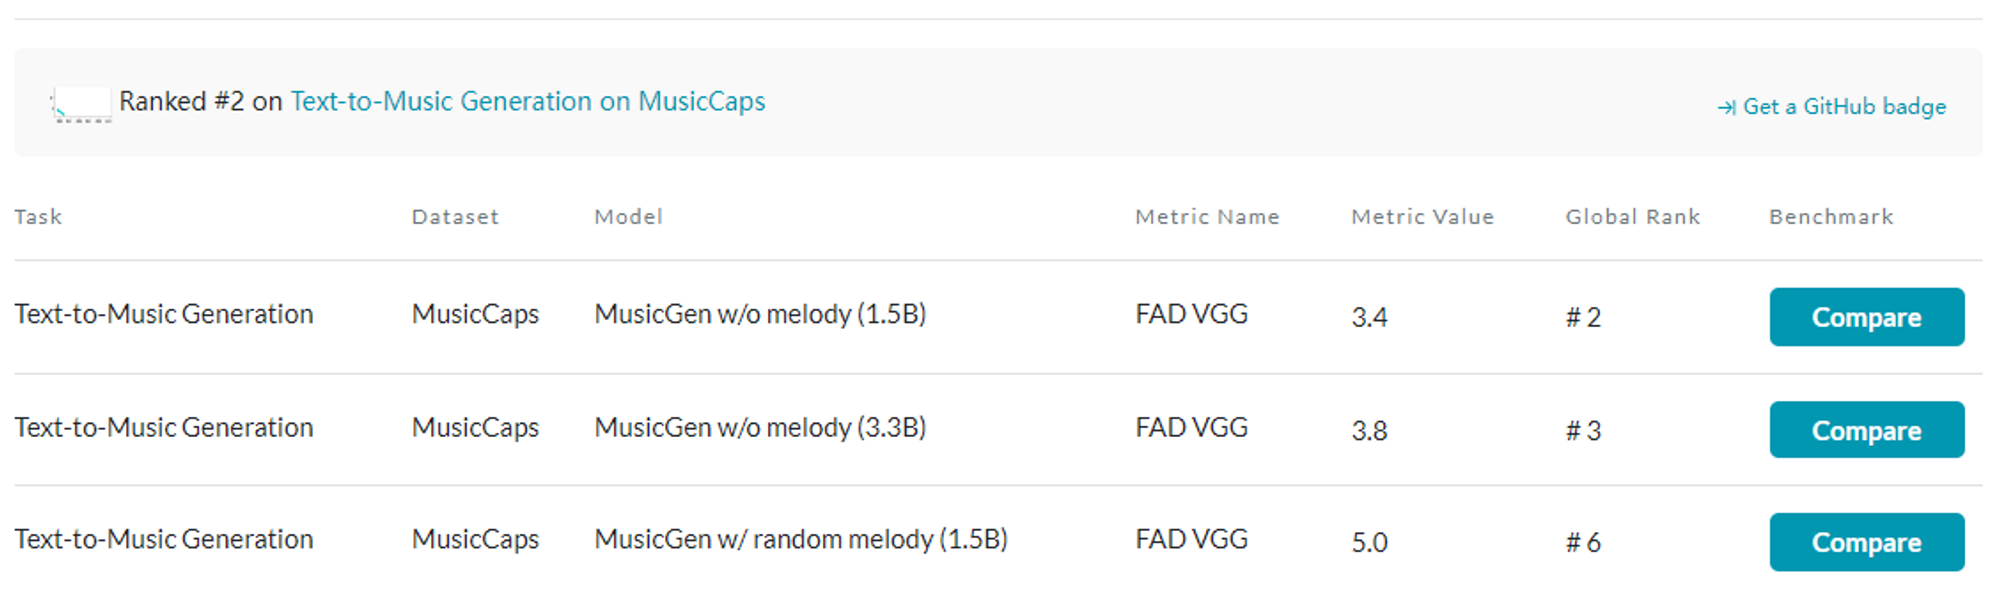

## 安装
Audiocraft 需要 Python 3.9、PyTorch 2.0.0 和内存至少为 16 GB 的 GPU（对于中型模型）。 要安装 Audiocraft，您可以运行以下命令：
```python
# Best to make sure you have torch installed first, in particular before installing xformers.
# Don't run this if you already have PyTorch installed.
pip install 'torch>=2.0'
# Then proceed to one of the following
pip install -U audiocraft  # stable release
pip install -U git+https://git@github.com/facebookresearch/audiocraft#egg=audiocraft  # bleeding edge
pip install -e .  # or if you cloned the repo locally
```

## API服务化

我们提供了一个简单的 API 和 4 个预训练模型。 预训练的模型是：

- `small`：300M 型号，仅限文本到音乐 - 🤗 Hub
- `medium`：1.5B 模型，仅限文本到音乐 - [🤗 Hub](https://huggingface.co/facebook/musicgen-medium)
- `melody`：1.5B模式，文字转音乐和文字+旋律转音乐 - [🤗 Hub](https://huggingface.co/facebook/musicgen-melody)
- `large`：3.3B 型号，仅限文本到音乐 - [🤗 Hub](https://huggingface.co/facebook/musicgen-large)

>为了在本地使用 MusicGen，您必须有一个 GPU。 我们建议使用 16GB 的内存，但较小的 GPU 将能够生成较短的序列，或使用较小的模型生成较长的序列

注意：请确保在使用较新版本的 torchaudio 时安装了 ffmpeg。

```python
apt-get install ffmpeg
```

### simple demo

```python
import torchaudio
from audiocraft.models import MusicGen
from audiocraft.data.audio import audio_write

model = MusicGen.get_pretrained('small')
model.set_generation_params(duration=8)  # generate 8 seconds.
wav = model.generate_unconditional(4)    # generates 4 unconditional audio samples
descriptions = ['happy rock', 'energetic EDM', 'sad jazz']
wav = model.generate(descriptions)  # generates 3 samples.

melody, sr = torchaudio.load('./assets/bach.mp3')
# generates using the melody from the given audio and the provided descriptions.
wav = model.generate_with_chroma(descriptions, melody[None].expand(3, -1, -1), sr)

for idx, one_wav in enumerate(wav):
    # Will save under {idx}.wav, with loudness normalization at -14 db LUFS.
    audio_write(f'{idx}', one_wav.cpu(), model.sample_rate, strategy="loudness", loudness_compressor=True)
```

### colab demo
https://colab.research.google.com/drive/10uu3ov84peXXyF5iAjg_2El3sZpAyUmr